In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
import numpy as np

In [61]:
def parabola(x, a, b, c):
    return a * x**2 + b * x + c

def linear(x, m, b):
    return m * x + b

def gsin(theta, g):
    return g*np.sin(np.radians(theta))

In [37]:
# define function to clean up data 

# Clean data by removing NaN and Inf values
def clean_data(x, y):
    # Convert to numpy arrays if they're not already
    x_np = np.array(x)
    y_np = np.array(y)
    
    # Create mask for valid values (not NaN or Inf)
    mask = ~np.isnan(x_np) & ~np.isnan(y_np) & ~np.isinf(x_np) & ~np.isinf(y_np)
    
    # Apply mask
    return x_np[mask], y_np[mask]

In [38]:
# Load data from the Excel file

try:
  df_5grados = pd.read_excel("5 grados.xlsx", skiprows=1)
except FileNotFoundError:
  print("Error: 5 grados.xlsx' not found.")
  exit()
  
try:
  df_10grados = pd.read_excel("10 grados.xlsx", skiprows=1)
except FileNotFoundError:
  print("Error: 10 grados.xlsx' not found.")
  exit()

try:
  df_15grados = pd.read_excel("15 grados.xlsx", skiprows=1)
except FileNotFoundError:
  print("Error: 15 grados.xlsx' not found.")
  exit()

try:
  df_20grados = pd.read_excel("20 grados.xlsx", skiprows=1)
except FileNotFoundError:
  print("Error: 20 grados.xlsx' not found.")
  exit()

try:
  df_25grados = pd.read_excel("25 grados.xlsx", skiprows=1)
except FileNotFoundError:
  print("Error: 25 grados.xlsx' not found.")
  exit()  


In [39]:
df_20grados.head()

,t,x,vx,ax
0,0.00000,0.002023,NaN,NaN
1,0.01657,0.002286,0.04604,NaN
2,0.03313,0.003548,-0.00794,6.410
3,0.04970,0.002023,0.19000,4.522
4,0.06630,0.009843,0.26400,2.557


# 1) $x$ vs $t$

De 5 en 5 hasta  30

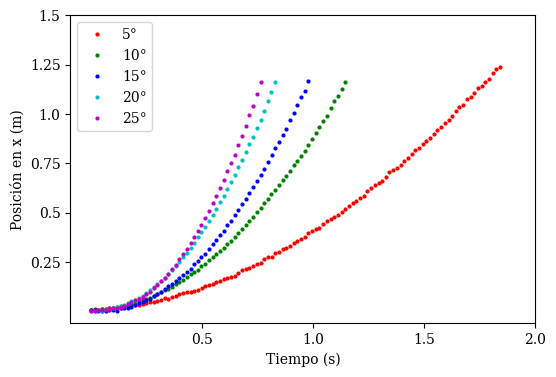

In [40]:

# Adapt column names if different
t_5grados = df_5grados['t']
x_5grados = df_5grados['x']

t_10grados = df_10grados['t']
x_10grados = df_10grados['x']

t_15grados = df_15grados['t']
x_15grados = df_15grados['x']

t_20grados = df_20grados['t']
x_20grados = df_20grados['x']

t_25grados = df_25grados['t']
x_25grados = df_25grados['x']

#define the function for the regression curve

# popt, pcov = opt.curve_fit(parabola, x_balon, y_balon)
# print("Parabola coefficients for balon:", popt)

plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
#plt.rcParams["font.size"] = 12
# Add the new set of points to the existing plot
plt.plot(t_5grados, x_5grados, marker='o', markersize=2 , linestyle='None', color='r', label='5°')
plt.plot(t_10grados, x_10grados, marker='o', markersize=2 , linestyle='None', color='g', label='10°')
plt.plot(t_15grados, x_15grados, marker='o', markersize=2 , linestyle='None', color='b', label='15°')
plt.plot(t_20grados, x_20grados, marker='o', markersize=2 , linestyle='None', color='c', label='20°')
plt.plot(t_25grados, x_25grados, marker='o', markersize=2 , linestyle='None', color='m', label='25°')


# Add labels, title, legend (if needed)
plt.xlabel("Tiempo (s)")
plt.ylabel("Posición en x (m)")
#plt.title("Plot with Data from Two Sources")
plt.legend()  # Show the legend


xticks_positions = [0.5, 1.0, 1.5, 2.0]
xticks_labels = ['0.5', '1.0', '1.5', '2.0']

yticks_positions = [0.25, 0.5, 0.75, 1.0, 1.25, 1.5]
yticks_labels = ['0.25', '0.5', '0.75', '1.0', '1.25', '1.5']



plt.xticks(xticks_positions, xticks_labels)
plt.yticks(yticks_positions, yticks_labels)

# image size
plt.gcf().set_size_inches(6, 4)
plt.savefig("x-vs-t.png", dpi=300, bbox_inches="tight")
# Display the plot
plt.show()


# 2) $v_x$ vs $t$ 

Equation for 5°: y = 0.65x + 0.07
Equation for 10°: y = 1.76x + 0.01
Equation for 15°: y = 2.67x + -0.12
Equation for 20°: y = 3.60x + -0.09
Equation for 25°: y = 4.72x + -0.29


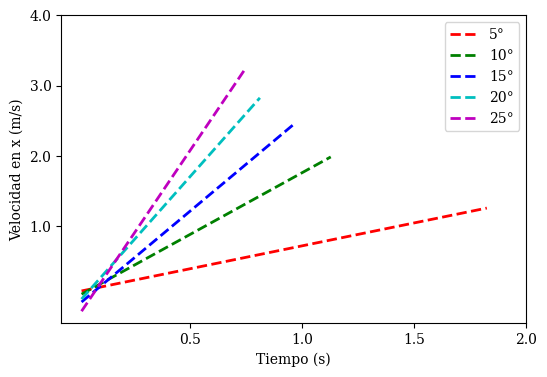

In [46]:

# Adapt column names if different
t_5grados = df_5grados['t']
vx_5grados = df_5grados['vx']
t_5grados, vx_5grados = clean_data(t_5grados, vx_5grados)

t_10grados = df_10grados['t']
vx_10grados = df_10grados['vx']
t_10grados, vx_10grados = clean_data(t_10grados, vx_10grados)

t_15grados = df_15grados['t']
vx_15grados = df_15grados['vx']
t_15grados, vx_15grados = clean_data(t_15grados, vx_15grados)

t_20grados = df_20grados['t']
vx_20grados = df_20grados['vx']
t_20grados, vx_20grados = clean_data(t_20grados, vx_20grados)

t_25grados = df_25grados['t']
vx_25grados = df_25grados['vx']
t_25grados, vx_25grados = clean_data(t_25grados, vx_25grados)

#define the function for the regression curve

popt5, pcov5 = opt.curve_fit(linear, t_5grados, vx_5grados)
print("Equation for 5°: y = {:.2f}x + {:.2f}".format(popt5[0], popt5[1]))
popt10, pcov10 = opt.curve_fit(linear, t_10grados, vx_10grados)
print("Equation for 10°: y = {:.2f}x + {:.2f}".format(popt10[0], popt10[1]))
popt15, pcov15 = opt.curve_fit(linear, t_15grados, vx_15grados)
print("Equation for 15°: y = {:.2f}x + {:.2f}".format(popt15[0], popt15[1]))
popt20, pcov20 = opt.curve_fit(linear, t_20grados, vx_20grados)
print("Equation for 20°: y = {:.2f}x + {:.2f}".format(popt20[0], popt20[1]))
popt25, pcov25 = opt.curve_fit(linear, t_25grados, vx_25grados)
print("Equation for 25°: y = {:.2f}x + {:.2f}".format(popt25[0], popt25[1]))



plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
#plt.rcParams["font.size"] = 12
# Add the new set of points to the existing plot
# plt.plot(t_5grados, vx_5grados, marker='o', markersize=2 , linestyle='None', color='r', label='5°')
# plt.plot(t_10grados, vx_10grados, marker='o', markersize=2 , linestyle='None', color='g', label='10°')
# plt.plot(t_15grados, vx_15grados, marker='o', markersize=2 , linestyle='None', color='b', label='15°')
# plt.plot(t_20grados, vx_20grados, marker='o', markersize=2 , linestyle='None', color='c', label='20°')
# plt.plot(t_25grados, vx_25grados, marker='o', markersize=2 , linestyle='None', color='m', label='25°')

#lineas de regresion

plt.plot(t_5grados, linear(t_5grados, *popt5), color='r', linestyle='dashed', linewidth=2, label='5°')
plt.plot(t_10grados, linear(t_10grados, *popt10), color='g', linestyle='dashed', linewidth=2, label='10°')
plt.plot(t_15grados, linear(t_15grados, *popt15), color='b', linestyle='dashed', linewidth=2, label='15°')
plt.plot(t_20grados, linear(t_20grados, *popt20), color='c', linestyle='dashed', linewidth=2, label='20°')
plt.plot(t_25grados, linear(t_25grados, *popt25), color='m', linestyle='dashed', linewidth=2, label='25°')


# Add labels, title, legend (if needed)
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad en x (m/s)")
#plt.title("Plot with Data from Two Sources")
plt.legend()  # Show the legend


xticks_positions = [0.5, 1.0, 1.5, 2.0]
xticks_labels = ['0.5', '1.0', '1.5', '2.0']

yticks_positions = [1.0, 2.0, 3.0, 4.0]
yticks_labels = ['1.0', '2.0', '3.0', '4.0']



plt.xticks(xticks_positions, xticks_labels)
plt.yticks(yticks_positions, yticks_labels)

# image size
plt.gcf().set_size_inches(6, 4)
plt.savefig("vx-vs-t.png", dpi=300, bbox_inches="tight")
# Display the plot
plt.show()


# 3) $a_y$ vs $t$

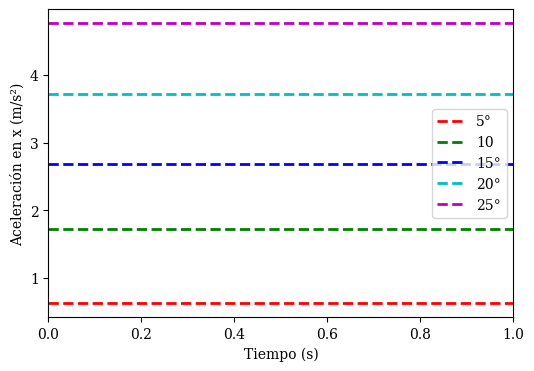

In [48]:

# Adapt column names if different
t_5grados = df_5grados['t']
ax_5grados = df_5grados['ax']
t_5grados, ax_5grados = clean_data(t_5grados, ax_5grados)
ax_5_average = ax_5grados.mean()

t_10grados = df_10grados['t']
ax_10grados = df_10grados['ax']
t_10grados, ax_10grados = clean_data(t_10grados, ax_10grados)
ax_10_average = ax_10grados.mean()

t_15grados = df_15grados['t']
ax_15grados = df_15grados['ax']
t_15grados, ax_15grados = clean_data(t_15grados, ax_15grados)
ax_15_average = ax_15grados.mean()

t_20grados = df_20grados['t']
ax_20grados = df_20grados['ax']
t_20grados, ax_20grados = clean_data(t_20grados, ax_20grados)
ax_20_average = ax_20grados.mean()

t_25grados = df_25grados['t']
ax_25grados = df_25grados['ax']
t_25grados, ax_25grados = clean_data(t_25grados, ax_25grados)
ax_25_average = ax_25grados.mean()


plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
#plt.rcParams["font.size"] = 12
# Add the new set of points to the existing plot
# plt.plot(t_5grados, ax_5grados, marker='o', markersize=2 , linestyle='None', color='r', label='5°')
# plt.plot(t_10grados, ax_10grados, marker='o', markersize=2 , linestyle='None', color='g', label='10°')
# plt.plot(t_15grados, ax_15grados, marker='o', markersize=2 , linestyle='None', color='b', label='15°')
# plt.plot(t_20grados, ax_20grados, marker='o', markersize=2 , linestyle='None', color='c', label='20°')
# plt.plot(t_25grados, ax_25grados, marker='o', markersize=2 , linestyle='None', color='m', label='25°')


plt.axhline(y=ax_5_average, color='r', linestyle='dashed', linewidth=2, label='5°')
plt.axhline(y=ax_10_average, color='g', linestyle='dashed', linewidth=2, label='10')
plt.axhline(y=ax_15_average, color='b', linestyle='dashed', linewidth=2, label='15°')
plt.axhline(y=ax_20_average, color='c', linestyle='dashed', linewidth=2, label='20°')
plt.axhline(y=ax_25_average, color='m', linestyle='dashed', linewidth=2, label='25°')


# Add labels, title, legend (if needed)
plt.xlabel("Tiempo (s)")
plt.ylabel("Aceleración en x (m/s²)")
#plt.title("Plot with Data from Two Sources")
plt.legend()  # Show the legend


# image size
plt.gcf().set_size_inches(6, 4)
plt.savefig("ax-vs-t.png", dpi=300, bbox_inches="tight")
# Display the plot
plt.show()


# 4) $a_x$ vs $\sin\theta$

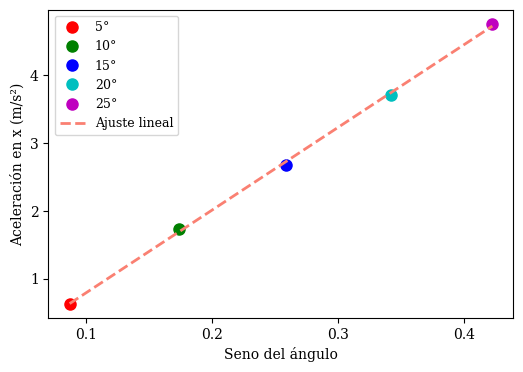

In [58]:
ax_averages = np.array([ax_5_average, ax_10_average, ax_15_average, ax_20_average, ax_25_average])
sin = np.sin(np.array(np.radians([5, 10, 15, 20, 25])))

# Fit a linear regression line to the data

popt, pcov = opt.curve_fit(linear, sin, ax_averages)
x_fit = np.linspace(min(sin), max(sin), 100)
y_fit = linear(x_fit, *popt)

xticks_positions = [0.1, 0.2, 0.3, 0.4, 0.5]
xticks_labels = ['0.1', '0.2', '0.3', '0.4', '0.5']

plt.xticks(xticks_positions, xticks_labels)


plt.plot(sin[0], ax_averages[0], marker='o', markersize=8 , linestyle='None', color='r', label='5°')
plt.plot(sin[1], ax_averages[1], marker='o', markersize=8 , linestyle='None', color='g', label='10°')
plt.plot(sin[2], ax_averages[2], marker='o', markersize=8 , linestyle='None', color='b', label='15°')
plt.plot(sin[3], ax_averages[3], marker='o', markersize=8 , linestyle='None', color='c', label='20°')
plt.plot(sin[4], ax_averages[4], marker='o', markersize=8 , linestyle='None', color='m', label='25°')

plt.plot(x_fit, y_fit, color='salmon', label='Ajuste lineal', linestyle='dashed', linewidth=2)


# Add labels, title, legend (if needed)
plt.xlabel("Seno del ángulo")
plt.ylabel("Aceleración en x (m/s²)")

plt.legend(fontsize=9)  # Show the legend


# image size
plt.gcf().set_size_inches(6, 4)
plt.savefig("a-vs-sintheta.png", dpi=300, bbox_inches="tight")
# Display the plot
plt.show()


In [ ]:
print("Pendiente de la recta de ajuste:", popt[0])
print("Ordenada al origen de la recta de ajuste:", popt[1])
print("Error de la pendiente:", np.sqrt(pcov[0][0]))
#error con respecto al valor de la gravedad
g = 9.81
error = (popt[0] - g) / g * 100
print("Error con respecto al valor de la gravedad:", error, "%")

Pendiente de la recta de ajuste: 12.207631449856217
Ordenada al origen de la recta de ajuste: -0.4338598384591865
Error de la pendiente: 0.17021095950271956
Error con respecto al valor de la gravedad: 24.44068756224482 %


Valor de g para la regresion con sin es g = 10.815775131570648
Error con respecto al valor de la gravedad: 10.25254976116868 %


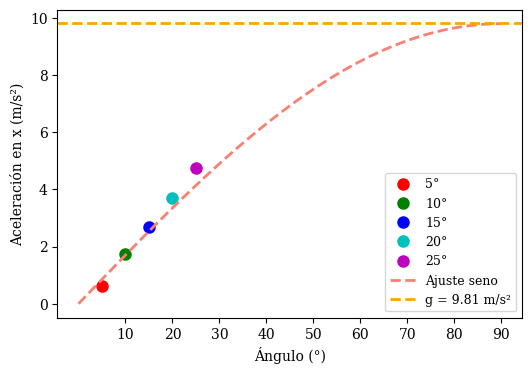

In [80]:
ax_averages = np.array([ax_5_average, ax_10_average, ax_15_average, ax_20_average, ax_25_average])
angles = np.array([5, 10, 15, 20, 25])

# Fit a linear regression line to the data

popt, pcov = opt.curve_fit(gsin, angles, ax_averages)
x_fit = np.linspace(min(angles), max(angles), 100)
y_fit = gsin(x_fit, *popt)

print("Valor de g para la regresion con sin es g =", popt[0])
#print("Error de la pendiente:", np.sqrt(pcov[0][0]))
#error con respecto al valor de la gravedad
g = 9.81
error = (popt[0] - g) / g * 100
print("Error con respecto al valor de la gravedad:", error, "%")

xticks_positions = [10, 20, 30, 40, 50, 60, 70, 80, 90]
xticks_labels = ['10', '20', '30', '40', '50', '60', '70', '80', '90']

plt.xticks(xticks_positions, xticks_labels)


plt.plot(angles[0], ax_5_average, marker='o', markersize=8 , linestyle='None', color='r', label='5°')
plt.plot(angles[1], ax_10_average,marker='o', markersize=8 , linestyle='None', color='g', label='10°')
plt.plot(angles[2], ax_15_average, marker='o', markersize=8 , linestyle='None', color='b', label='15°')
plt.plot(angles[3], ax_20_average, marker='o', markersize=8 , linestyle='None', color='c', label='20°')
plt.plot(angles[4], ax_25_average, marker='o', markersize=8 , linestyle='None', color='m', label='25°')

# plt.plot(x_fit, y_fit, color='salmon', label='Ajuste seno', linestyle='dashed', linewidth=2)

# plot of the function gsin between 0 and 90 degrees

x = np.linspace(0, 90, 100)
y = gsin(x, 9.8)

plt.plot(x, y, color='salmon', label='Ajuste seno', linestyle='dashed', linewidth=2)
plt.axhline(y=g, color='orange', linestyle='dashed', linewidth=2, label='g = 9.81 m/s²')


# Add labels, title, legend (if needed)
plt.xlabel("Ángulo (°)")
plt.ylabel("Aceleración en x (m/s²)")

plt.legend(fontsize=9)  # Show the legend


# image size
plt.gcf().set_size_inches(6, 4)
plt.savefig("a-vs-theta.png", dpi=300, bbox_inches="tight")
# Display the plot
plt.show()
